<a href="https://colab.research.google.com/github/aditi10998/EDA_Capstone_Project3-Cardiovascular_risk_prediction-/blob/main/Cardiovascular_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Cardiovascular Risk Prediction**
The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.


---


**Variables**

Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

**Data Description**

Demographic: 



• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)

Behavioral
• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

Predict variable (desired target)
• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV




In this capstone project we are going to work on a dataset of an ongoing  cardiovascular study on residents of the town of Framingham,Massachusetts.The classification goal is to predict whether the patient has a 10 year risk of future coronary heart disease(CHD).In this project we will be using Classification technique of supervised machine learning.

**Classification** is a technique where we categorize data into given number of class.The main goal of a classification problem is to identify the category/class to which a new data will fall under.

# **Important Libraries**

In [ ]:
#Mounting Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Data Splitting
from sklearn.model_selection import train_test_split
# Data Scaling
from sklearn.preprocessing import MinMaxScaler
# Data Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report

# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV



**Data Acquisition**

In [ ]:
#Loading files from google drive to colab and storing in a variable.
File1="/content/drive/MyDrive/EDA_Capstone_Project3/data_cardiovascular_risk.csv"

In [ ]:
import warnings
warnings.filterwarnings("ignore")

#Creating Dataframes from csv files
Cardiovascular_risk_df=pd.read_csv(File1)

**Dimensions of Dataset**

In [ ]:
#Shape
Cardiovascular_risk_df.shape

(3390, 17)

Our dataset contains 3390 rows and 17 columns.

**Peek the Data**

In [ ]:
#To see the first 10 rows of the dataset
Cardiovascular_risk_df.head(20)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
6,6,61,1.0,M,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0
7,7,36,4.0,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0
8,8,41,2.0,F,YES,20.0,NaN,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0
9,9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,NaN,0


**Statistical Summary**

In [ ]:
#Descriptions
Cardiovascular_risk_df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


This is the basic statistical computations on the dataset.Using describe function gives a good picture of the distribution of data.

**Overview of dataset**

In [ ]:
Cardiovascular_risk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

Our dataset consists of 3390 enteries and 17 columns which has various datatypes.

In [ ]:
Cardiovascular_risk_df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

Columns displayed as per their labels.

## **Feature Engineering**

**Dimension Reduction**

In [ ]:
print("Duplicates in id:-",Cardiovascular_risk_df.id.duplicated().sum())

Duplicates in id:- 0


In [ ]:
#set id as index
Cardiovascular_risk_df.set_index('id',inplace=True)

In [ ]:
Cardiovascular_risk_df.head(5)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
#To check for missing values
Cardiovascular_risk_df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

Fields like education,cigsPerDay,BPMeds,totChol,glucose are having missing values.

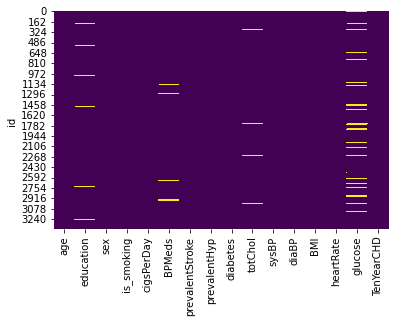

In [ ]:
#Heatmap for missing values
sns.heatmap(Cardiovascular_risk_df.isnull(),cbar=False,cmap='viridis')

In [ ]:
Cardiovascular_risk_df.sample(20)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
2736,42,1.0,F,YES,30.0,0.0,0,0,0,187.0,96.0,67.0,24.23,72.0,84.0,0
2733,59,2.0,F,YES,1.0,0.0,0,0,0,236.0,139.0,84.0,22.70,63.0,NaN,0
568,39,1.0,M,YES,20.0,0.0,0,0,0,253.0,104.0,64.0,27.48,65.0,74.0,0
537,41,4.0,F,NO,0.0,0.0,0,0,0,257.0,122.0,73.0,24.17,96.0,104.0,0
563,44,1.0,M,YES,40.0,0.0,0,1,0,201.0,142.5,104.5,34.59,67.0,67.0,0
1193,50,1.0,M,NO,0.0,0.0,0,1,0,230.0,133.0,91.0,25.74,72.0,70.0,0
531,55,2.0,M,NO,0.0,0.0,0,1,0,198.0,176.0,109.0,28.45,60.0,85.0,0
1017,43,3.0,M,YES,30.0,0.0,0,0,0,218.0,121.0,69.0,24.21,65.0,103.0,0
2264,43,2.0,F,NO,0.0,0.0,0,0,0,247.0,131.0,88.0,27.64,72.0,61.0,0


In [ ]:
Cardiovascular_risk_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
#Handling missing values
Cardiovascular_risk_df['glucose'] = Cardiovascular_risk_df['glucose'].fillna(Cardiovascular_risk_df['glucose'].median())
Cardiovascular_risk_df['heartRate'] = Cardiovascular_risk_df['heartRate'].fillna(Cardiovascular_risk_df['heartRate'].mode()[0])
Cardiovascular_risk_df['cigsPerDay'] = Cardiovascular_risk_df['cigsPerDay'].fillna(Cardiovascular_risk_df['cigsPerDay'].mean()) 
Cardiovascular_risk_df['totChol'] = Cardiovascular_risk_df['totChol'].fillna(Cardiovascular_risk_df['totChol'].median())
Cardiovascular_risk_df['BMI'] = Cardiovascular_risk_df['BMI'].fillna(Cardiovascular_risk_df['BMI'].median())
Cardiovascular_risk_df['BPMeds'] = Cardiovascular_risk_df['BPMeds'].fillna(Cardiovascular_risk_df['BPMeds'].mode()[0])
Cardiovascular_risk_df['education']=Cardiovascular_risk_df['education'].fillna(Cardiovascular_risk_df['education'].mode()[0])

In [ ]:
Cardiovascular_risk_df.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# **Outliers**

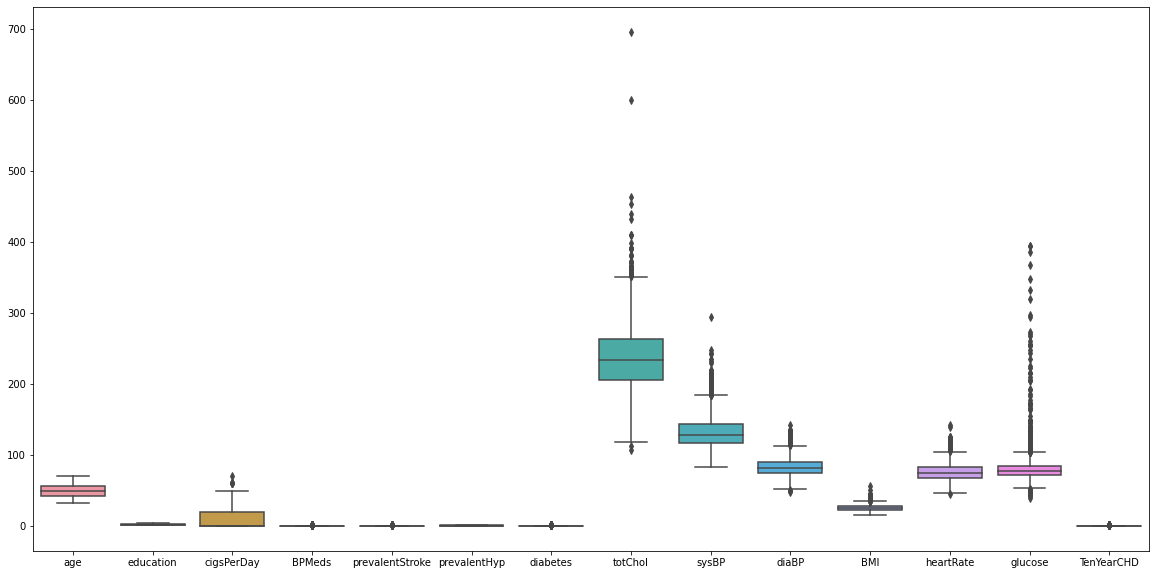

In [ ]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=Cardiovascular_risk_df)
plt.show()

In [ ]:
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [ ]:
print('cigsPerDay')
out_iqr(Cardiovascular_risk_df,'cigsPerDay')
print('totChol')
out_iqr(Cardiovascular_risk_df,'totChol')
print('sysBP')
out_iqr(Cardiovascular_risk_df,'sysBP')
print('diaBP')
out_iqr(Cardiovascular_risk_df,'diaBP')
print('BMI')
out_iqr(Cardiovascular_risk_df,'BMI')
print('heartRate')
out_iqr(Cardiovascular_risk_df,'heartRate')
print('glucose')
out_iqr(Cardiovascular_risk_df,'glucose')

cigsPerDay
The IQR is 20.0
The lower bound value is -30.0
The upper bound value is 50.0
Total number of outliers are 9
totChol
The IQR is 58.0
The lower bound value is 119.0
The upper bound value is 351.0
Total number of outliers are 43
sysBP
The IQR is 27.0
The lower bound value is 76.5
The upper bound value is 184.5
Total number of outliers are 105
diaBP
The IQR is 15.5
The lower bound value is 51.25
The upper bound value is 113.25
Total number of outliers are 58
BMI
The IQR is 4.967499999999998
The lower bound value is 15.578750000000005
The upper bound value is 35.44875
Total number of outliers are 79
heartRate
The IQR is 15.0
The lower bound value is 45.5
The upper bound value is 105.5
Total number of outliers are 64
glucose
The IQR is 13.0
The lower bound value is 52.5
The upper bound value is 104.5
Total number of outliers are 214


**Imputing Outliers:**

We already have less data in our dataset.Hence we will impute the outliers rather deleting them.

In [ ]:
def Impute_outliers(df , column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    # calculate the IQR
    iqr = q3 - q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    med = np.median(df[column])
    for i in df[column]:
       if i > Upper_tail:
          df[column] = df[column].replace(i, med)
    return 

In [ ]:
Cardiovascular_risk_df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
Impute_outliers(Cardiovascular_risk_df,'cigsPerDay')
Impute_outliers(Cardiovascular_risk_df,'totChol')
Impute_outliers(Cardiovascular_risk_df,'sysBP')
Impute_outliers(Cardiovascular_risk_df,'diaBP')
Impute_outliers(Cardiovascular_risk_df,'BMI')
Impute_outliers(Cardiovascular_risk_df,'heartRate')
Impute_outliers(Cardiovascular_risk_df,'glucose')

In [ ]:
print("Maximum Cholestrol:-",Cardiovascular_risk_df['totChol'].max())
print("maximun Blood pressure:-",Cardiovascular_risk_df['sysBP'].max())
print("Maximum Cigrates per Day:-",Cardiovascular_risk_df['cigsPerDay'].max())

Maximum Cholestrol:- 351.0
maximun Blood pressure:- 184.5
Maximum Cigrates per Day:- 50.0


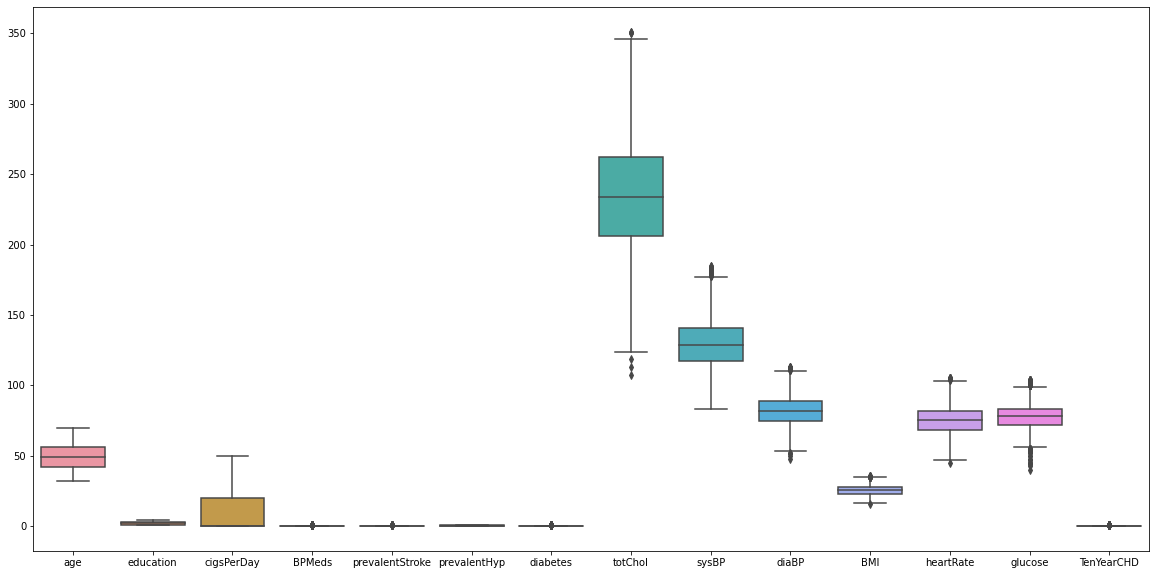

In [ ]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=Cardiovascular_risk_df)
plt.show()

## **Explorartory Data Analysis**

In [ ]:
Cardiovascular_risk_df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64



* **Target Variable**



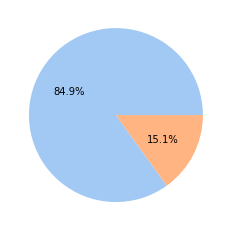

In [ ]:
#data=Cardiovascular_risk_df['TenYearCHD']
colors=sns.color_palette('pastel')[0:5]
#labels=0,1
plt.pie(Cardiovascular_risk_df["TenYearCHD"].value_counts(),autopct="%1.1f%%",colors=colors)
plt.show()



Conclusion:
The distribution of target variable is highly imbalanced.This will lead problem in fitting of models.Therefore this problem should be handled.

## **1.Univariate Analysis**



*  **Categorical Features**



In [ ]:
categorical_features=['sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes']

In [ ]:
for feature in categorical_features:
    print(feature,':')
    print(Cardiovascular_risk_df[feature].value_counts())
    print("========================")


sex :
F    1923
M    1467
Name: sex, dtype: int64
is_smoking :
NO     1703
YES    1687
Name: is_smoking, dtype: int64
BPMeds :
0.0    3290
1.0     100
Name: BPMeds, dtype: int64
prevalentStroke :
0    3368
1      22
Name: prevalentStroke, dtype: int64
prevalentHyp :
0    2321
1    1069
Name: prevalentHyp, dtype: int64
diabetes :
0    3303
1      87
Name: diabetes, dtype: int64


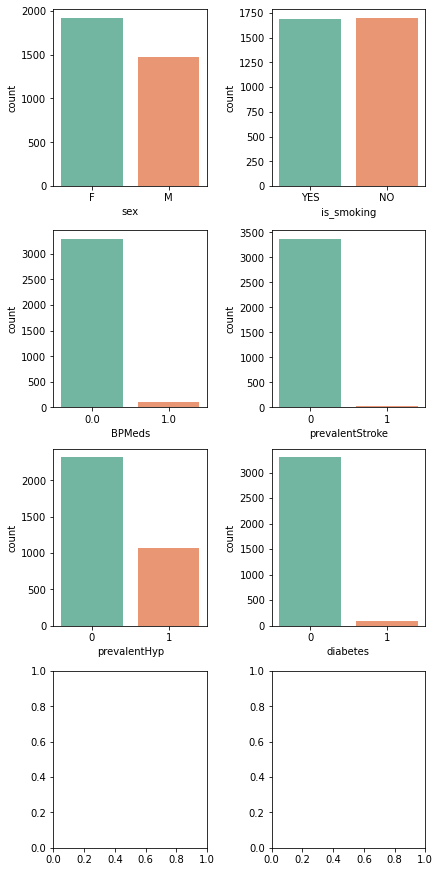

In [ ]:
num_plots = len(categorical_features)
total_cols = 2
total_rows = num_plots//total_cols + 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(3*total_cols, 3*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(categorical_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=Cardiovascular_risk_df, ax=axs[row][pos],palette='Set2')


Conclusion:


*   BPmeds, prevalentStroke and diabetes are highly imbalanced.
* The number of Smokers and non-Smokers in is_smoking is almost the same.






* **Numerical Variables**




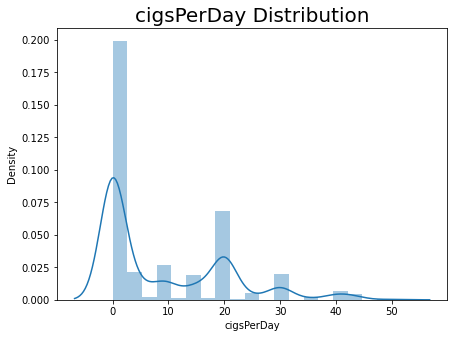

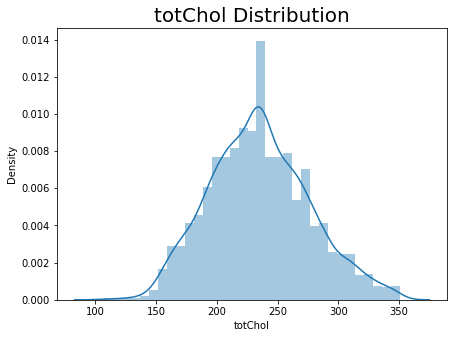

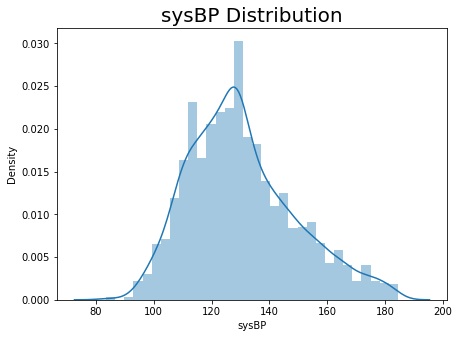

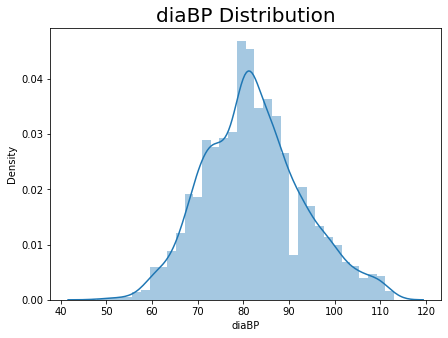

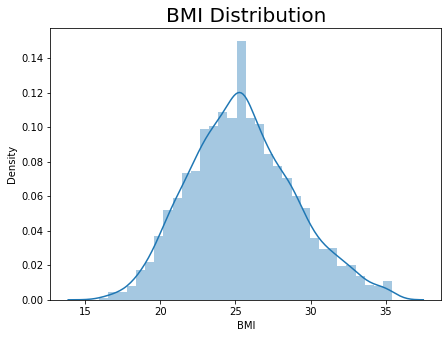

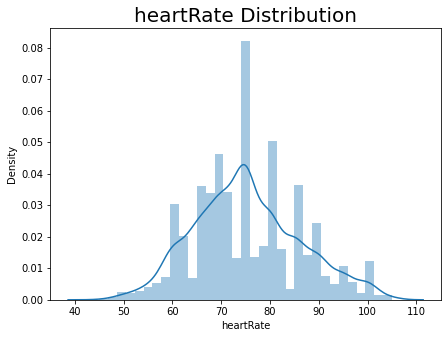

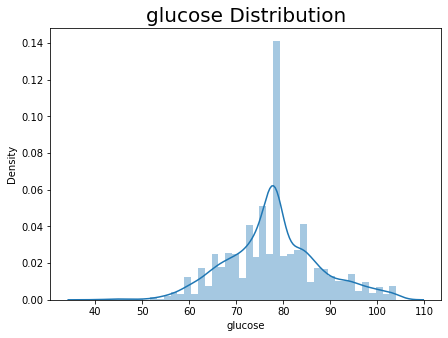

In [ ]:
numeric_features = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
for feature in numeric_features:
    plt.figure(figsize=(10,5), facecolor='w')
    ax1=fig.add_subplot(121)
    sns.distplot(Cardiovascular_risk_df[feature])
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()

Conclusion:
 

*  totChol,sysBP,diaBP,BMI have uniform distribution while heartRate, glucose and cigsPerDay are unevenly distributed.
*   cigsPerDay and sysBP are slightly right skewed.


*  cigsPerDay has most data present in 0 as well as it is highly unevenly distributed. 
*   Heartrate also has highly uneven distribution most data is present around 80. 





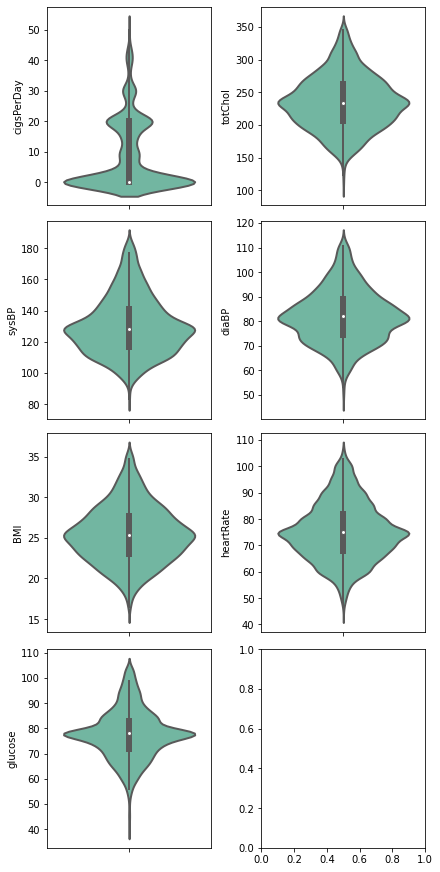

In [ ]:
num_plots = len(numeric_features)
total_cols = 2
total_rows = num_plots//total_cols + 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(3*total_cols, 3*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(numeric_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.violinplot(y=var, data=Cardiovascular_risk_df, ax=axs[row][pos], linewidth=2,palette='Set2')


## **2.Bivariate Analysis**





* **Countplot of people who is smoking or not according to the gender.**




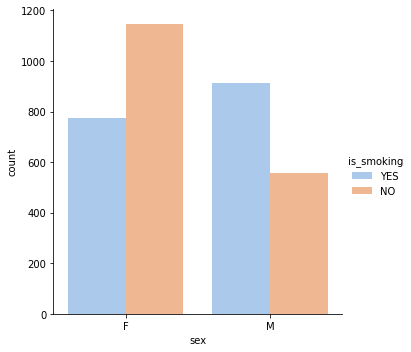

In [ ]:
sns.catplot(data=Cardiovascular_risk_df,kind='count',x='sex',hue='is_smoking',palette='pastel')
plt.show()

Conclusion:
Males smokes more compared to female.



* **No of people affecting with CHD on the basis of their sex**




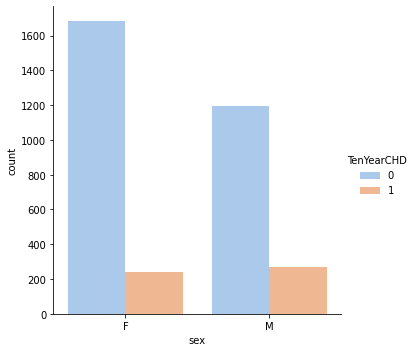

In [ ]:
sns.catplot(data=Cardiovascular_risk_df,kind='count',x='sex',hue='TenYearCHD',palette='pastel')
plt.show()

Conclusion:females and males both have equal chances of getting CHD.



*  **Chances of getting CHD according to age**



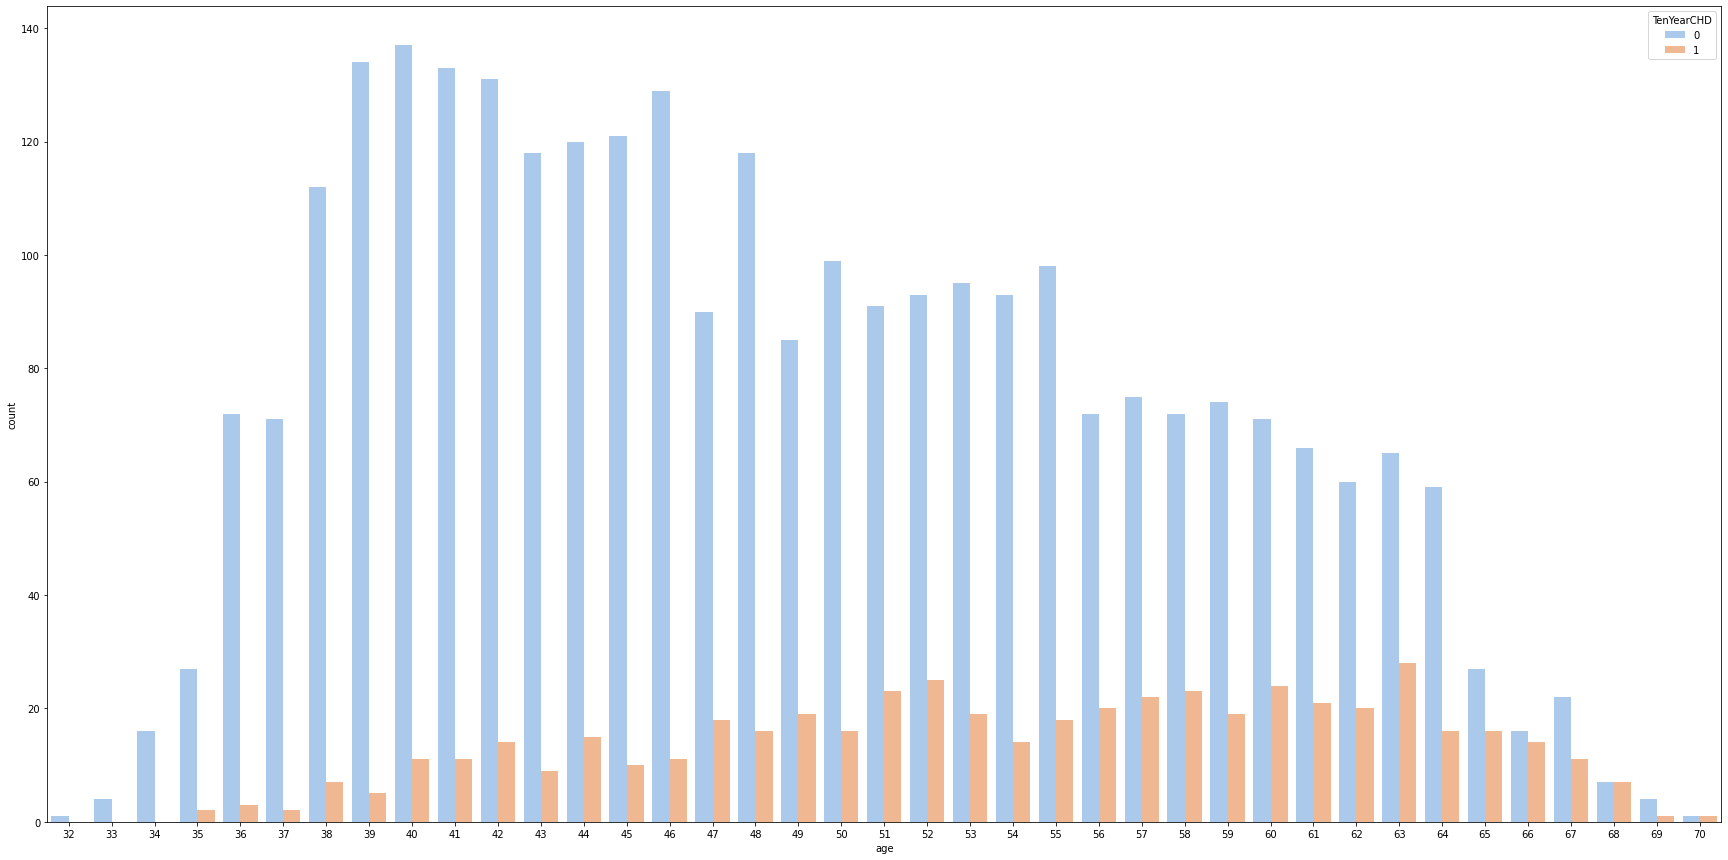

In [ ]:
plt.figure(figsize=(30,15))
sns.countplot(data=Cardiovascular_risk_df,x='age',hue='TenYearCHD',palette='pastel')
plt.show()

**Conclusion:**

Chances of getting CHD are mostly among the age group 35-50.

While age group below 35 has lowest chances of getting CHD. 



* **Relation between sysBP and risk of CHD **



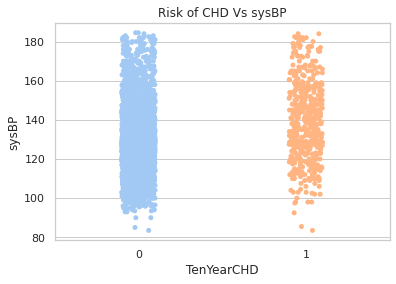

In [ ]:
sns.set(style='whitegrid')
ax=sns.stripplot(x='TenYearCHD',y='sysBP',data=Cardiovascular_risk_df,palette='pastel')
plt.title('Risk of CHD Vs sysBP')
plt.show()





* **Relation between diaBP and risk of TenYearCHD**



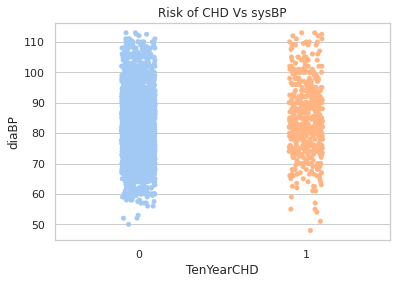

In [ ]:
sns.set(style='whitegrid')
ax=sns.stripplot(x='TenYearCHD',y='diaBP',data=Cardiovascular_risk_df,palette='pastel')
plt.title('Risk of CHD Vs sysBP')
plt.show()

## **3.Multivariate Analysis**

Relationship between Age,cigsPerDay and TenYearCHD

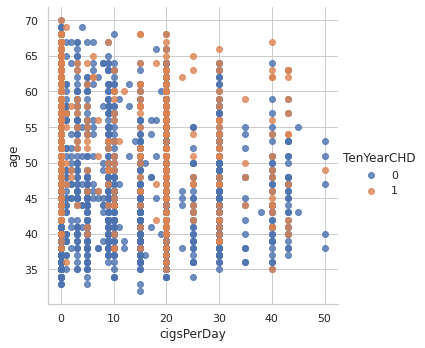

In [ ]:
sns.lmplot(x='cigsPerDay',y='age',hue='TenYearCHD',data=Cardiovascular_risk_df,fit_reg=False)

In [ ]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()

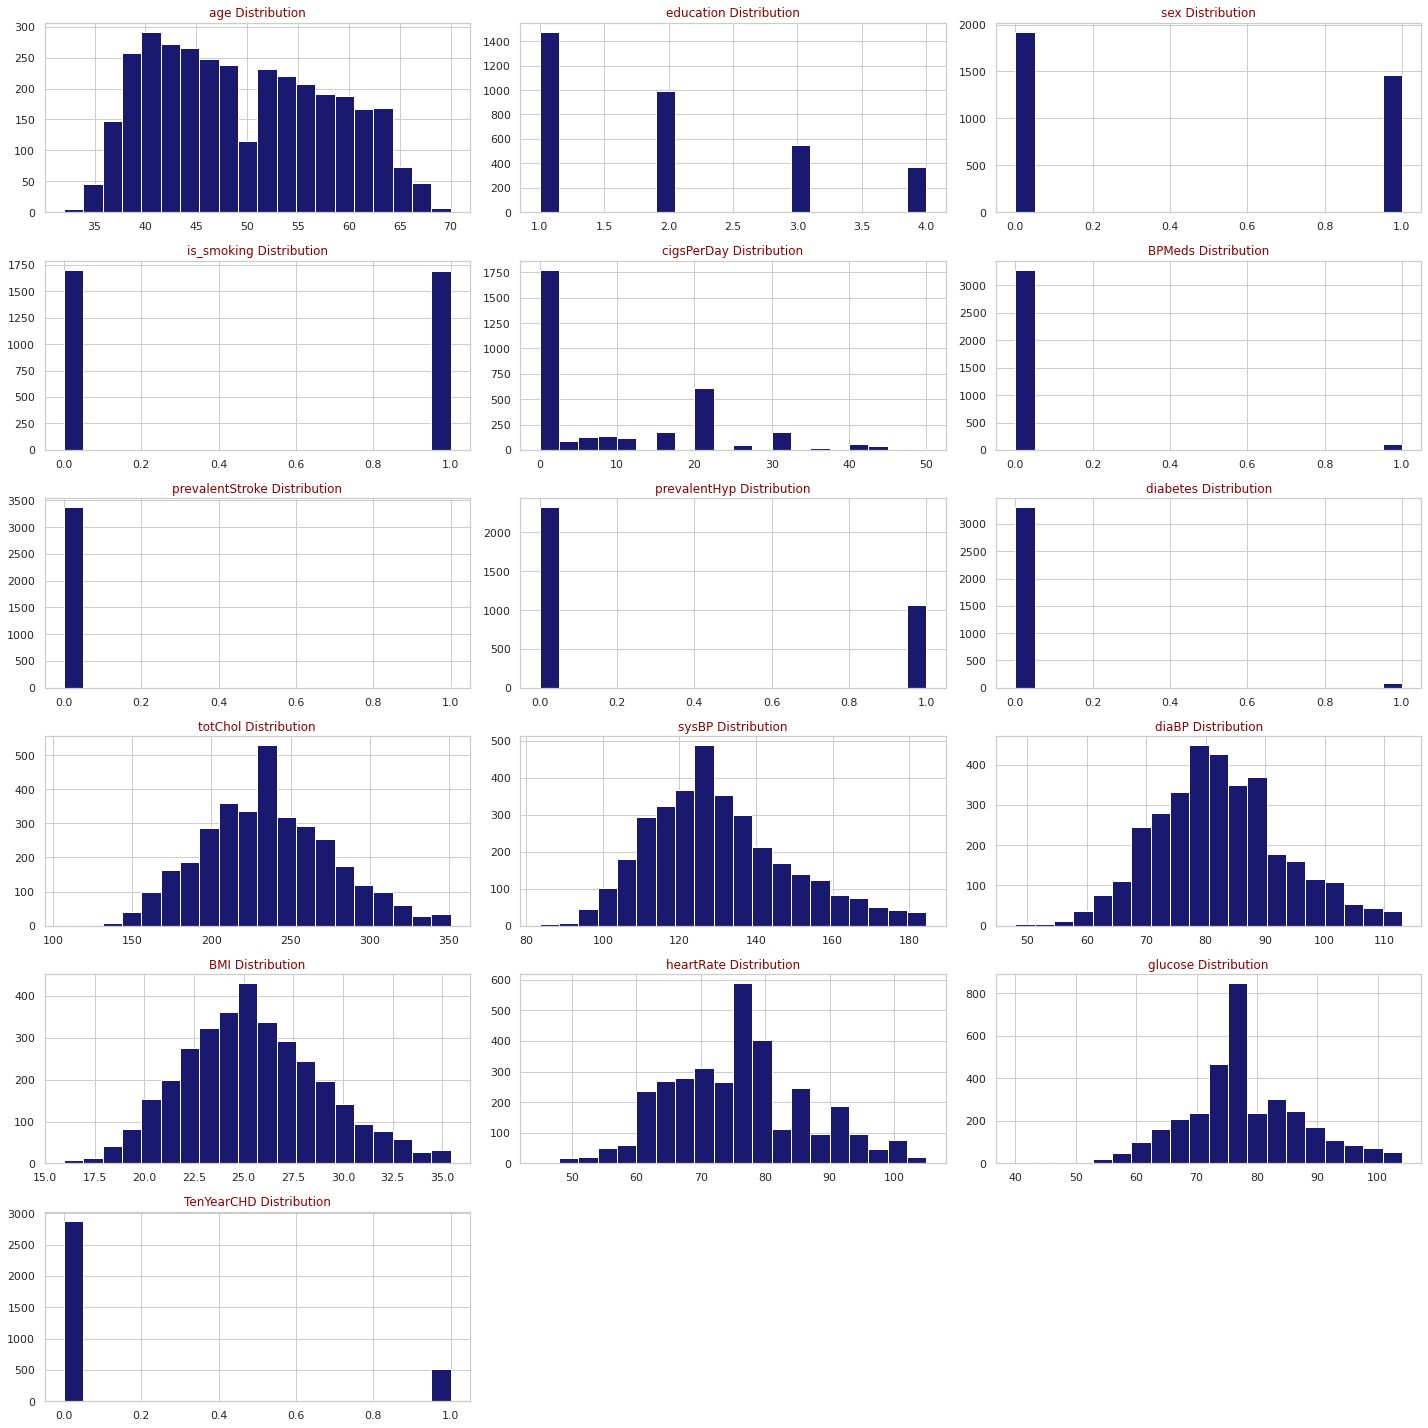

In [ ]:
draw_histograms(Cardiovascular_risk_df,Cardiovascular_risk_df,6,3)

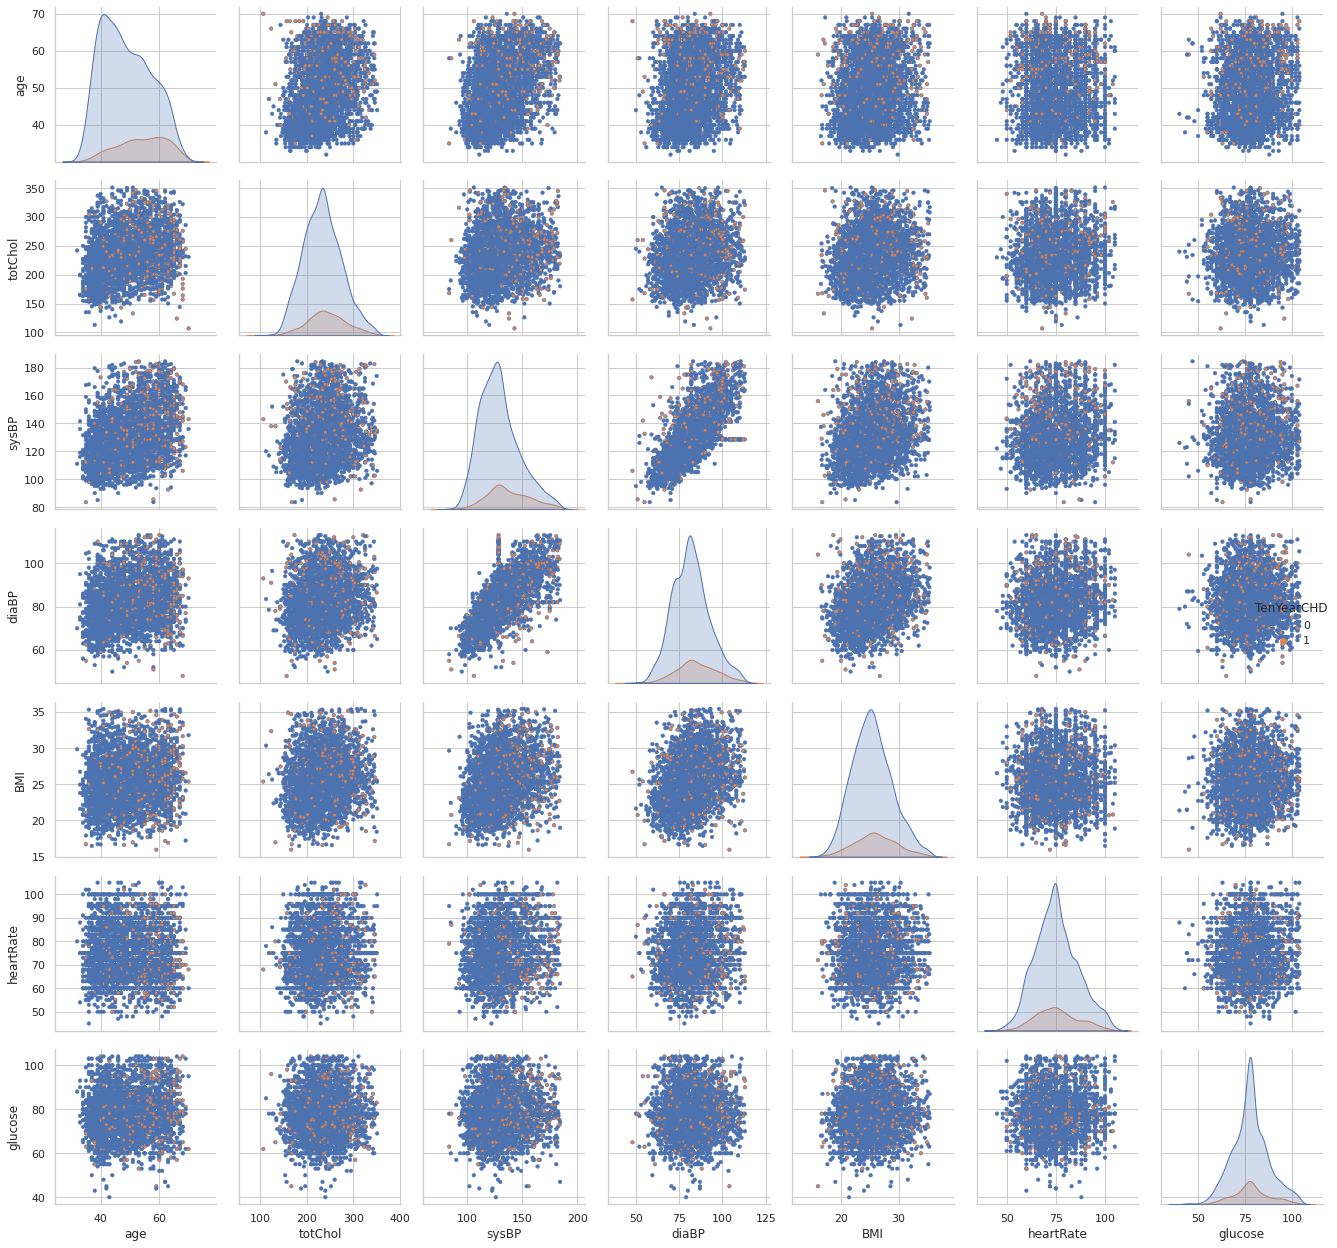

In [ ]:
sns.pairplot(Cardiovascular_risk_df,height=2.5,diag_kind='kde',markers=".",
             plot_kws=dict(s=50,edgecolor="b"),
             hue="TenYearCHD",
             vars=['age','totChol','sysBP','diaBP','BMI','heartRate','glucose'],
             diag_kws=dict(shade=True))
plt.tight_layout()
plt.show()

# **Label Encoding**

In [ ]:
#Label Encoding 
from sklearn.preprocessing import LabelEncoder
categ=['sex','is_smoking']

#Encode Categorical columns
le=LabelEncoder()
Cardiovascular_risk_df[categ]=Cardiovascular_risk_df[categ].apply(le.fit_transform)

In [ ]:
Cardiovascular_risk_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


We performed label encoding on sex and is_smoking columns as they contain only two output values.

## **Feature Selection**

**Feature selection**

Feature selection or variable selection is the process of selecting a subset of relevant features or variables from the total features of a level in a data set to build machine learning algorithms.

**Advantages of selecting features**

There are various advantages of feature selection process. These are as follows:-

* Improved accuracy
* Simple models are easier to interpret.
* Shorter training times
* Enhanced generalization by reducing Overfitting
* Easier to implement by software developers
* Reduced risk of data errors by model use
* Variable redundancy
* Bad learning behaviour in high dimensional spaces


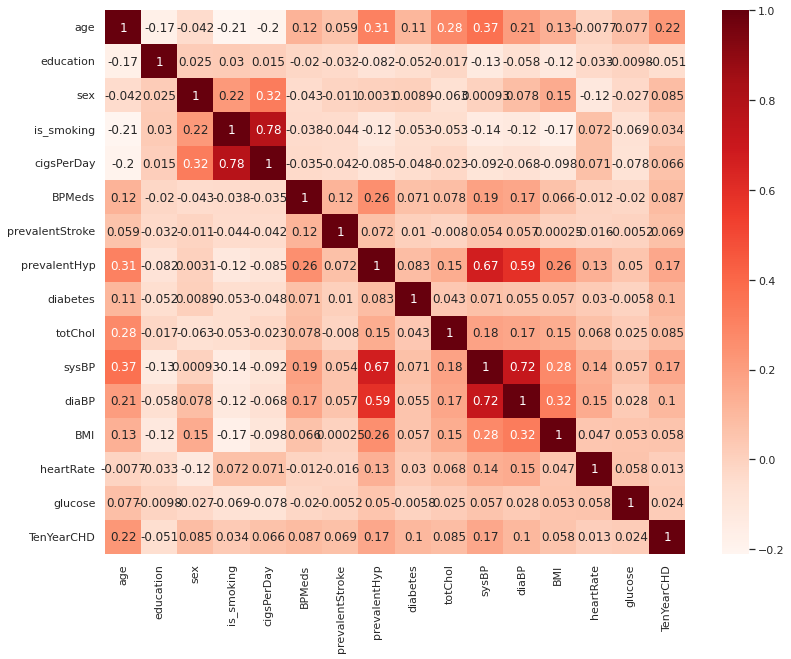

In [43]:
#Using Pearson Correlation
plt.figure(figsize=(13,10))
cor =Cardiovascular_risk_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

**Important**

In all feature selection procedures, it is good practice to select the features by examining only the training set. This is done to avoid overfitting.

In [44]:
Cardiovascular_risk_df.drop(['is_smoking'],axis=1,inplace=True)
Cardiovascular_risk_df.drop(['sysBP'],axis=1,inplace=True)

# **Feature Splitting and Scaling**

In [45]:
y = Cardiovascular_risk_df['TenYearCHD']
X = Cardiovascular_risk_df.drop(['TenYearCHD'], axis=1)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=1)


Dividing the dataset into training and test for predictive modeling.

In [46]:
X_train.columns

Index(['age', 'education', 'sex', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'diaBP', 'BMI', 'heartRate',
       'glucose'],
      dtype='object')


**2.Basic Methode for feature selection**
* **Remove quasi-constant features Using variance threshold from sklearn**
 * Variance threshold from sklearn is a simple baseline approach to feature selection. 
 * It removes all features which variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e., features that have the same value in all samples.

In [47]:
# using sklearn variancethreshold to find constant features
from sklearn.feature_selection import VarianceThreshold
# 0.1 indicates 99% of observations approximately
sel = VarianceThreshold(threshold=0.1)
# fit finds the features with zero variance
sel.fit(X_train)  

VarianceThreshold(threshold=0.1)

In [48]:
[x for x in X_train.columns if x not in X_train.columns[sel.get_support()]]

['BPMeds', 'prevalentStroke', 'diabetes']

We can see that 99% of the Observations show one value 0.Therefore,this feature is almost constant.

**Chi-Square test**

In [49]:
from sklearn.feature_selection import chi2
X = Cardiovascular_risk_df.drop(['age','totChol','diaBP','BMI','heartRate','TenYearCHD','glucose'],axis=1)
y = Cardiovascular_risk_df['TenYearCHD']

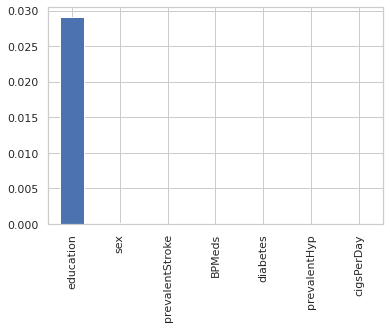

In [50]:
chi_scores = chi2(X,y)
chi_scores
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()
plt.show()

**Since education has higher the p-value, it says that this variables is independent of the repsone and can not be considered for model training**

In [51]:
#Removing  sorted feature
X = Cardiovascular_risk_df.drop(['TenYearCHD','education','BPMeds', 'prevalentStroke', 'diabetes'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [52]:
X_train.columns

Index(['age', 'sex', 'cigsPerDay', 'prevalentHyp', 'totChol', 'diaBP', 'BMI',
       'heartRate', 'glucose'],
      dtype='object')

**Scaling Independent Features**

In [53]:
scaler = MinMaxScaler()
train_x = scaler.fit_transform(X_train)
test_x = scaler.transform(X_test)


#**Balancing Target Variable**

**Over-sampling: SMOTE**
* SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picingk a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

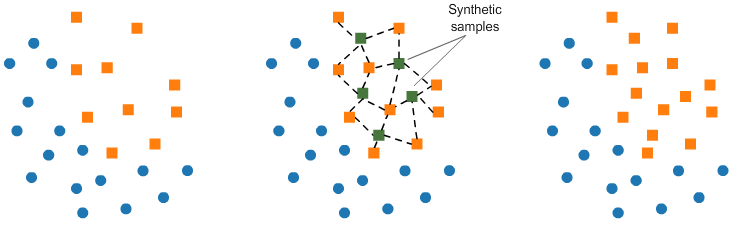

In [54]:
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 414
Before OverSampling, counts of label '0': 2298 

After OverSampling, the shape of train_X: (4596, 9)
After OverSampling, the shape of train_y: (4596,) 

After OverSampling, counts of label '1': 2298
After OverSampling, counts of label '0': 2298


# **Predictive Modeling**

### **Logistic Regression**
Logistic Regression utilizes the power of regression to do classification.
One of the main reasons for the model’s success is its power of explainability i.e. calling-out the contribution of individual predictors, quantitatively.Unlike regression which uses Least Squares, the model uses Maximum Likelihood to fit a sigmoid-curve on the target variable distribution.

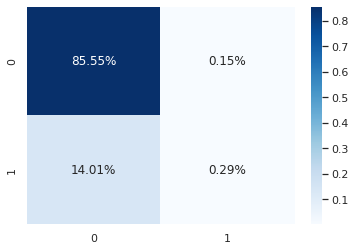

confussion matrix
[[580   1]
 [ 95   2]]


Accuracy of Logistic Regression: 85.84070796460178 

Recall  2.0618556701030926 

F1 Score 4.0 

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       581
           1       0.67      0.02      0.04        97

    accuracy                           0.86       678
   macro avg       0.76      0.51      0.48       678
weighted avg       0.83      0.86      0.80       678



In [60]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


m1 = 'LogisticRegression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
#confusion matrix
lr_conf_matrix = confusion_matrix(y_test, lr_predict)

sns.heatmap(lr_conf_matrix/np.sum(lr_conf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
plt.show()
#Accuracy score
lr_acc_score = accuracy_score(y_test, lr_predict)
#Recall
lr_re_score=recall_score(y_test, lr_predict)
#F1 Score
lr_f1_score=f1_score(y_test,lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print("Recall ",lr_re_score*100,"\n")
print("F1 Score",lr_f1_score*100,"\n")
print(classification_report(y_test,lr_predict))

**GridSearch over logistic regression with Hyper parameters**

In [56]:
from sklearn.model_selection import GridSearchCV
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
penalty = ['l2','l1']
c_values = [100, 10, 1.0, 0.1, 0.01]
parameters = dict(solver=solver_list,penalty=penalty,C=c_values)
lr = LogisticRegression(random_state=34, multi_class="auto", n_jobs=-1, C=1,max_iter=100)
clf = GridSearchCV(lr, parameters, cv=10)

In [57]:
clf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(C=1, n_jobs=-1, random_state=34),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l2', 'l1'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']})

In [58]:
clf.best_params_

{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

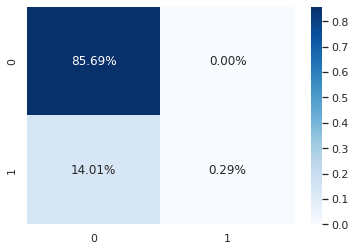

confussion matrix
[[581   0]
 [ 95   2]]


Accuracy of Logistic Regression: 85.9882005899705 

Recall  2.0618556701030926 

F1 Score 4.040404040404041 

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       581
           1       1.00      0.02      0.04        97

    accuracy                           0.86       678
   macro avg       0.93      0.51      0.48       678
weighted avg       0.88      0.86      0.80       678



In [59]:
lr_hyper = LogisticRegression(random_state=1,C= 100, penalty= "l2", solver="newton-cg")
lr_hyper.fit(X_train, y_train)

lr_hyper_predict = lr_hyper.predict(X_test)
#confusion matrix
lr_hy_conf_matrix = confusion_matrix(y_test, lr_hyper_predict)
sns.heatmap(lr_hy_conf_matrix/np.sum(lr_hy_conf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
plt.show()

#Accuracy score
lr_hy_acc_score = accuracy_score(y_test, lr_hyper_predict)
#Recall
lr_hy_re_score=recall_score(y_test, lr_hyper_predict)
#F1 Score
lr_hy_f1_score=f1_score(y_test,lr_hyper_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_hy_acc_score*100,'\n')
print("Recall ",lr_hy_re_score*100,"\n")
print("F1 Score",lr_hy_f1_score*100,"\n")
print(classification_report(y_test,lr_hyper_predict))

### KNN
K-Nearest Neighbor (KNN) algorithm predicts based on the specified number (k) of the nearest neighboring data points. Here, the pre-processing of the data is significant as it impacts the distance measurements directly. Unlike others, the model does not have a mathematical formula, neither any descriptive ability.

Here, the parameter ‘k’ needs to be chosen wisely; as a value lower than optimal leads to bias, whereas a higher value impacts prediction accuracy.

It is a simple, fairly accurate model preferable mostly for smaller datasets, owing to huge computations involved on the continuous predictors.**bold text**

In [61]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [62]:
y_pred = classifier.predict(X_test)


Confusion Matrix:
[[564  17]
 [ 89   8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       581
           1       0.32      0.08      0.13        97

    accuracy                           0.84       678
   macro avg       0.59      0.53      0.52       678
weighted avg       0.79      0.84      0.80       678

Accuracy: 0.8436578171091446
Recall 0.08247422680412371
F1 Score 0.13114754098360656


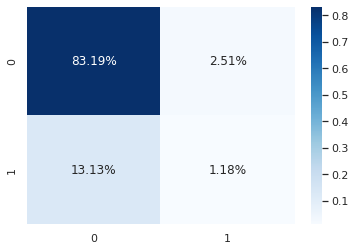

In [63]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
knn_confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(knn_confusion_matrix)
sns.heatmap(knn_confusion_matrix/np.sum(knn_confusion_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
#Accuracy Score
knn_acc = accuracy_score(y_test,y_pred)
print("Accuracy:",knn_acc)

#Recall
knn_re_score=recall_score(y_test,y_pred)
print("Recall",knn_re_score)

#F1 Score
knn_f1_score=f1_score(y_test,y_pred)
print("F1 Score",knn_f1_score)

K**NN after hyper-parameter tunning:**

In [64]:
from sklearn.model_selection import GridSearchCV
#dictionary of Hyperparameters that we want to tune.
grid_params = {'n_neighbors' : [2,5,7,9,11,13,16],'p':[3,5,7,9],'leaf_size':[1,3,8,15,20],
    'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
#Use GridSearch with KNN classifier
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=5, n_jobs = -1)

In [65]:
# fit the model on our train set
g_res = gs.fit(X_train, y_train)

Fitting 5 folds for each of 840 candidates, totalling 4200 fits


In [66]:
# find the best score
print("Best Score:-",g_res.best_score_)
# get the hyperparameters with the best score
print("Best parameters:-",g_res.best_params_)

Best Score:- 0.8473459596474419
Best parameters:- {'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 16, 'p': 3, 'weights': 'uniform'}


In [67]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors =16,leaf_size=1,p=3 ,weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=1, n_neighbors=16, p=3)

In [68]:
# get a prediction
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)

Training set accuracy:  0.8462389380530974
Test set accuracy:  0.8569321533923304
Confusion matrix
[[581   0]
 [ 97   0]]


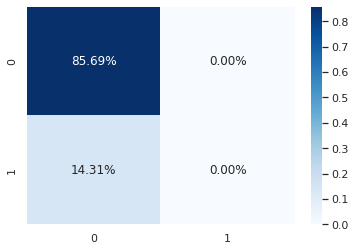

Accuracy: 0.8569321533923304
Recall 0.0
F1 Score 0.0
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       581
           1       0.00      0.00      0.00        97

    accuracy                           0.86       678
   macro avg       0.43      0.50      0.46       678
weighted avg       0.73      0.86      0.79       678



In [69]:
from seaborn.matrix import heatmap
from sklearn import metrics
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))

from sklearn.metrics import confusion_matrix
knn_hy_confusion_matrix=confusion_matrix(y_test, y_knn)
print("Confusion matrix")
print(knn_hy_confusion_matrix)

sns.heatmap(knn_hy_confusion_matrix/np.sum(knn_hy_confusion_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
plt.show()
#Accuracy Score
knn_hy_acc=accuracy_score(y_test,y_knn)
print("Accuracy:",knn_hy_acc)

#Recall
knn_hy_re_score=recall_score(y_test,y_knn)
print("Recall",knn_hy_re_score)

#F1 Score
knn_hy_f1_score=f1_score(y_test,y_knn)
print("F1 Score",knn_hy_f1_score)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_knn))

### **Decision Tree**

Decision trees help you to evaluate your options. Decision Trees are excellent tools for helping you to choose between several courses of action. They provide a highly effective structure within which you can lay out options and investigate the possible outcomes of choosing those options.

Accuracy 0.7492625368731564
Recall 0.23711340206185566
f1 score 0.21296296296296294
[[485  96]
 [ 74  23]]


              precision    recall  f1-score   support

           0       0.87      0.83      0.85       581
           1       0.19      0.24      0.21        97

    accuracy                           0.75       678
   macro avg       0.53      0.54      0.53       678
weighted avg       0.77      0.75      0.76       678



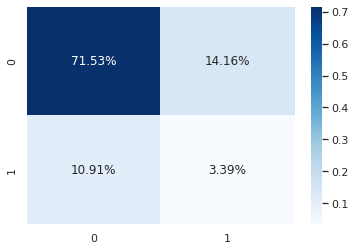

In [70]:
m4 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train,y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)

sns.heatmap(dt_conf_matrix/np.sum(dt_conf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

dt_acc_score = accuracy_score(y_test, dt_predicted)
print("Accuracy",dt_acc_score)

dt_re_score=recall_score(y_test,dt_predicted)
print("Recall",dt_re_score)

dt_f1_score=f1_score(y_test,dt_predicted)
print("f1 score",dt_f1_score)

print(dt_conf_matrix)
print("\n")
#print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

**GridSearch over Decision Tree with Hyper-parameter tuning**

In [71]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [72]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [73]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
CPU times: user 360 ms, sys: 16.9 ms, total: 377 ms
Wall time: 1.74 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [74]:
# find the best score
print("Best Score:-",grid_search.best_score_)
# get the hyperparameters with the best score
print("Best parameters:-",grid_search.best_params_)

Best Score:- 0.8484513274336283
Best parameters:- {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 50}


Accuracy 0.8569321533923304
Recall 0.0
f1 score 0.0
[[581   0]
 [ 97   0]]


              precision    recall  f1-score   support

           0       0.86      1.00      0.92       581
           1       0.00      0.00      0.00        97

    accuracy                           0.86       678
   macro avg       0.43      0.50      0.46       678
weighted avg       0.73      0.86      0.79       678



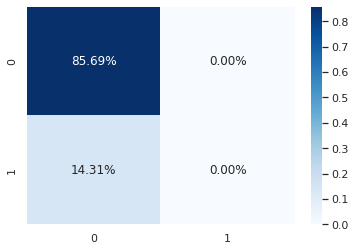

In [75]:

dt_hyper = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf= 50,random_state=0)
dt_hyper.fit(X_train,y_train)
dt_hyper_predicted = dt_hyper.predict(X_test)
dt_hyper_conf_matrix = confusion_matrix(y_test, dt_hyper_predicted)

sns.heatmap(dt_hyper_conf_matrix/np.sum(dt_hyper_conf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

dt_hyper_acc_score = accuracy_score(y_test, dt_hyper_predicted)
print("Accuracy",dt_hyper_acc_score)

dt_hyper_re_score=recall_score(y_test,dt_hyper_predicted)
print("Recall",dt_hyper_re_score)

dt_hyper_f1_score=f1_score(y_test,dt_hyper_predicted)
print("f1 score",dt_hyper_f1_score)

print(dt_hyper_conf_matrix)
print("\n")
#print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_hyper_predicted))

## **Algorithms Based on Bagging **


### **Random Forest Classifier**

A Random Forest is a reliable ensemble of multiple Decision Trees (or CARTs); though more popular for classification, than regression applications. Here, the individual trees are built via bagging (i.e. aggregation of bootstraps which are nothing but multiple train datasets created via sampling of records with replacement) and split using fewer features. The resulting diverse forest of uncorrelated trees exhibits reduced variance; therefore, is more robust towards change in data and carries its prediction accuracy to new data.

However, the algorithm does not work well for datasets having a lot of outliers, something which needs addressing prior to the model building.

In [76]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [77]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=7, 
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=7, verbose=2)

In [78]:
rf_hyper = rf_random.best_estimator_
rf_hyper.fit(X_train,y_train)
print("Accuracy on training set is : {}".format(rf_hyper.score(X_train,y_train)))
print("Accuracy on validation set is : {}".format(rf_hyper.score(X_test, y_test)))
rf_predicted = rf_hyper.predict(X_test)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("Accuracy of Hyper-tuned Random Forest Classifier:",rf_acc_score*100,'\n')

rf_re_score=recall_score(y_test,rf_predicted)
print("Recall",rf_re_score)

rf_f1_score=f1_score(y_test,rf_predicted)
print("f1 score",rf_f1_score)  

print(classification_report(y_test, rf_predicted))

Accuracy on training set is : 0.9022861356932154
Accuracy on validation set is : 0.8480825958702065
Accuracy of Hyper-tuned Random Forest Classifier: 84.80825958702066 

Recall 0.020618556701030927
f1 score 0.037383177570093455
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       581
           1       0.20      0.02      0.04        97

    accuracy                           0.85       678
   macro avg       0.53      0.50      0.48       678
weighted avg       0.76      0.85      0.79       678



## **Model Comparison**

In [79]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','logisticWith tunning',
                                   "knn","Knn with tunning",
                                   "Decision Tree",'Decision Tree with tunning',
                                   "Random Forest"],
                          'Accuracy':[lr_acc_score*100,lr_hy_acc_score*100,knn_acc*100,knn_hy_acc*100,dt_acc_score*100,dt_hyper_acc_score*100,rf_acc_score*100], 
                                                                                      
                         "Recall":[lr_re_score,lr_hy_re_score,knn_re_score,knn_hy_re_score,dt_re_score,dt_hyper_re_score,rf_re_score],
                         "F1_Score":[lr_f1_score,lr_hy_f1_score,knn_f1_score,knn_hy_f1_score,dt_f1_score,dt_hyper_f1_score,rf_f1_score]})
model_ev

,Model,Accuracy,Recall,F1_Score
0,Logistic Regression,85.840708,0.020619,0.040000
1,logisticWith tunning,85.988201,0.020619,0.040404
2,knn,84.365782,0.082474,0.131148
3,Knn with tunning,85.693215,0.000000,0.000000
4,Decision Tree,74.926254,0.237113,0.212963
5,Decision Tree with tunning,85.693215,0.000000,0.000000
6,Random Forest,84.808260,0.020619,0.037383
